### Text Classification

Steps:

1. Install the libraries
2. Load the data
3. Load the BERT pretained tokenizer model
4. Process the data and generate the encodings
5. Train the classification model
6. Evaluate the model
7. Save the model
8. Predict the output

### Application: Classify Email as Spam and Not Spam

1. Install libraries

In [ ]:
!pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 121.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.7 MB/s eta 0:00:00


#### 2. Load the data

In [ ]:
# Read the dataset csv file
import pandas as pd
df = pd.read_csv('./dataset/email.csv')
df.head()

,Unnamed: 0,Category,Message
0,0,not-spam,"Go until jurong point, crazy.. Available only ..."
1,1,not-spam,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,not-spam,U dun say so early hor... U c already then say...
4,4,not-spam,"Nah I don't think he goes to usf, he lives aro..."


<Axes: >

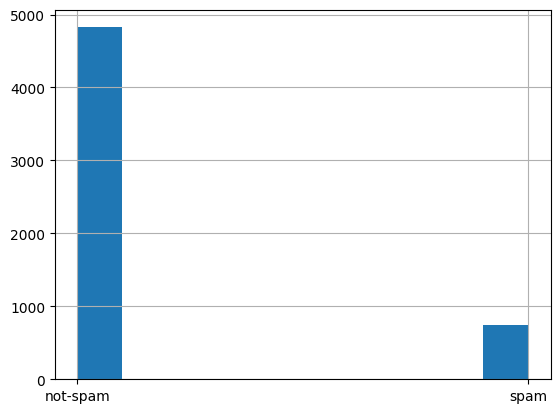

In [ ]:
df['Category'].hist()

#### 3. Load the BERT pretrained tokenizer model

In [ ]:
# Load the BERT pretained model
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

#### 4. Process the data

In [ ]:
# Process the data
def process_data(row):

    text = row['Message']
    text = str(text)

    encodings = tokenizer(text, padding="max_length", truncation=True, max_length=128)

    label = 0
    if row['Category'] == 'spam':
        label += 1

    encodings['label'] = label
    encodings['text'] = text

    return encodings

In [ ]:
# Test the function for sample data
print(process_data({
    'Message': "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune.",
    'Category': "not-spam"
}))

{'input_ids': [101, 2004, 2566, 2115, 5227, 1005, 11463, 2571, 11463, 2571, 1006, 2030, 2226, 8117, 28987, 11231, 3070, 18447, 2063, 27617, 5575, 2226, 29525, 15464, 1007, 1005, 2038, 2042, 2275, 2004, 2115, 20587, 8525, 2638, 2005, 2035, 20587, 2015, 1012, 2811, 1008, 1023, 2000, 6100, 2115, 2814, 20587, 8525, 2638, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 

In [ ]:
# Generate encoding for all the rows in the csv file
processed_data = []

for i in range(len(df[:100])):
    processed_data.append(process_data(df.iloc[i]))

#### 5. Train the model

In [ ]:
# Split the train and test dataset
from sklearn.model_selection import train_test_split

new_df = pd.DataFrame(processed_data)

train_df, valid_df = train_test_split(
    new_df,
    test_size=0.2,
    random_state=2022
)

In [ ]:
!pip install pyarrow
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.2 MB/s eta 0:00:00


In [ ]:
# convert the data into Dataset format to support the training model
import pyarrow as pa
from datasets import Dataset

train = Dataset(pa.Table.from_pandas(train_df))
valid = Dataset(pa.Table.from_pandas(valid_df))

In [ ]:
# Create the model
from transformers import TrainingArguments, Trainer, AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=2
)

training_args = TrainingArguments(output_dir="./result", evaluation_strategy="epoch")

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train,
    eval_dataset=valid,
    tokenizer=tokenizer
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Train the model
trainer.train()

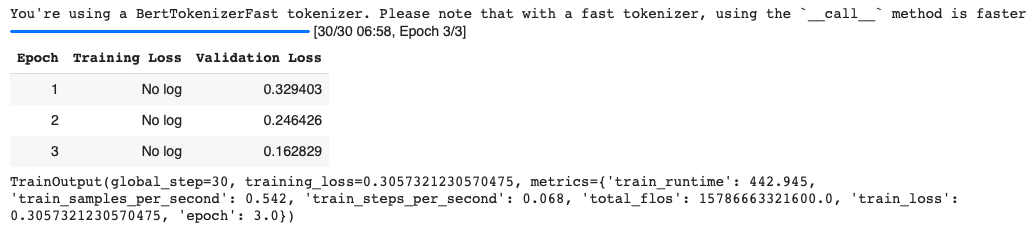

#### 6. Evaluate the model

In [ ]:
# Evaluate the model
trainer.evaluate()

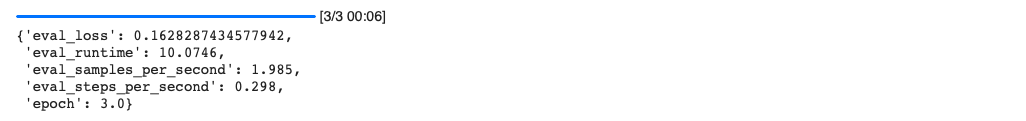

#### 7. Save the model

In [ ]:
# Save the model
model.save_pretrained('./model/')

#### 8. Predict the output

Given an email, predict if the email is a spam or not a spam


In [ ]:
from transformers import AutoModelForSequenceClassification, TextClassificationPipeline

model = AutoModelForSequenceClassification.from_pretrained('./model/',
                                                           id2label={0: 'not-spam', 1: 'spam'})

pipe = TextClassificationPipeline(model=model, tokenizer=tokenizer, return_all_scores=True)

pipe("Congratulations ur awarded £500 of CD gift vouchers or £125 gift guaranteed & Freeentry 2 £100")

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


[[{'label': 'not-spam', 'score': 0.10829919576644897},
  {'label': 'spam', 'score': 0.8917008638381958}]]